<h1 align="center">Data Science - Final Project</h1>
<h1 align="center">Air Pollution</h1>

<h2 align="center">Thành viên nhóm</h2>

|MSSV|Họ và Tên
|:---|:-
|18120212|Huỳnh Long Nam
|18120293|Vòng Cảnh Chi


# Giới thiệu đề tài

Theo UNICEF, thực trạng ô nhiễm môi trường hiện nay khá nóng và đang diễn ra ở khắp nơi trên thế giới, đặc biệt tại các nước đang phát triển, trong đó có Việt Nam. Bên cạnh ô nhiễm môi trường đất, nước do chất thải từ các công ty, xí nghiệp chưa qua xử lý đúng quy trình bị xả thẳng ra môi trường thì chất thải, khói bụi từ hoạt động của các nhà máy sản xuất, khí thải từ các phương tiện giao thông,... đã làm cho chất lượng không khí, đặc biệt tại các thành phố lớn, giảm sút và ô nhiễm đáng kể gây ra ô nhiễm không khí khá trầm trọng. Ô nhiễm không khí làm cho mọi người phải tiếp xúc với các hạt mịn trong không khí bị ô nhiễm. Các hạt mịn này thâm nhập sâu vào phổi và hệ thống tim mạch, gây ra các bệnh đột quỵ, bệnh tim, ung thư phổi, bệnh phổi tắc nghẽn mãn tính và các bệnh nhiễm trùng đường hô hấp, ảnh hưởng tới các nền kinh tế và chất lượng cuộc sống của con người. 

Ô nhiễm không khí đe dọa sức khỏe của người dân ở khắp mọi nơi trên thế giới. Ước tính mới đây năm 2018 cho thấy rằng 9/10 người dân phải hít thở không khí chứa hàm lượng các chất gây ô nhiễm cao. Ô nhiễm không khí cả ở bên ngoài và trong nhà gây ra khoảng 7 triệu ca tử vong hàng năm trên toàn cầu; chỉ tính riêng khu vực Tây Thái Bình Dương, khoảng 2,2 triệu người tử vong mỗi năm. Ở Việt Nam, khoảng 60.000 người chết mỗi năm có liên quan đến ô nhiễm không khí.


Vì vậy nhóm quyết định thu thập dữ liệu về chất lượng không khí ở các thành phố lớn, cụ thể là thành phố Hồ Chí Minh, để có những cái nhìn về chất lượng không khí nơi đó cũng như tại các thành phố lớn trên thế giới.

Dừ liệu được nhóm em thu thập từ https://openweathermap.org

## Import các thư viện cần thiết

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Bắt đầu quá trình thu thập dữ liệu

Chúng em sẽ thu thập dữ liệu thông qua api do trang https://openweathermap.org đã cung cấp sẵn và lưu và biến data.
Api: http://api.openweathermap.org/data/2.5/air_pollution/history?lat=10.7546664&lon=106.415029&start=946726894&end=1610129052&appid=9f7c977884b479967cee75682a860b6b

In [2]:
#REST API
'''
    Sử dụng api từ openweathermap.org
    Lấy dữ liệu chất lượng không khí tại TP HCM từ 2000 - 2021 
    Nhận được 1032 bộ dữ liệu ~ 3 năm

'''
data=requests.get('http://api.openweathermap.org/data/2.5/air_pollution/history?lat=10.7546664&lon=106.415029&start=946726894&end=1610129052&appid=9f7c977884b479967cee75682a860b6b')

In [3]:
#Parse JSON
air_quality=json.loads(data.text)

In [4]:
#Test
air_quality['list'][0]

{'main': {'aqi': 2},
 'components': {'co': 560.76,
  'no': 0.27,
  'no2': 12.34,
  'o3': 13.23,
  'so2': 2.5,
  'pm2_5': 15.88,
  'pm10': 20.87,
  'nh3': 13.55},
 'dt': 1610064000}

In [5]:
#Simplize dicts
def make_flat_dict(p):
    res={};
    components=p['components']
    
    res['dt']=p['dt']
    res['co']=components['co']
    res['no']=components['no']
    res['no2']=components['no2']
    res['o3']=components['o3']
    res['so2']=components['so2']
    res['pm2_5']=components['pm2_5']
    res['pm10']=components['pm10']
    res['nh3']=components['nh3']
    res['aqi']=p['main']['aqi']
    
    return res
    pass

In [6]:
# Make list records
list_records=[]
for record in air_quality['list']:
    list_records.append(make_flat_dict(record))
    

Kích thước dữ liệu thu được

In [7]:
len(list_records)

1056

In [8]:
#Write to csv
with open('air_quality.csv', 'w',newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=list_records[0].keys())
        writer.writeheader()
        for data in list_records:
            writer.writerow(data)

---

# Khám phá dữ liệu (đủ để có thể xác định câu hỏi)

In [9]:
# Đọc dữ liệu từ file đã thu thập trước đó
data_df = pd.read_csv('air_quality.csv')

**Tổng quan về dữ liệu thu được**

In [10]:
data_df.head(10)

,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,1610064000,560.76,0.27,12.34,13.23,2.50,15.88,20.87,13.55,2
1,1610060400,720.98,0.18,16.97,9.48,2.33,24.32,31.66,13.30,3
2,1610056800,1068.12,0.48,24.33,5.10,2.71,42.46,55.44,13.05,4
3,1610053200,1321.79,0.86,28.10,2.06,3.46,58.54,77.71,13.30,5
4,1610049600,1255.04,0.57,25.71,3.80,3.55,56.81,78.01,12.92,5
5,1610046000,1148.22,0.36,23.99,6.17,3.61,51.32,72.30,13.17,5
6,1610042400,1174.93,0.55,25.71,5.54,3.93,51.19,71.86,15.71,5
7,1610038800,1121.52,1.19,27.08,4.25,4.59,47.50,68.12,17.48,4
8,1610035200,1121.52,0.88,28.45,5.54,5.42,46.37,67.81,19.76,4
9,1610031600,1054.76,0.41,28.45,8.76,5.84,42.41,63.20,18.49,4


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [11]:
data_df.shape

(1056, 10)

## Tổng quan về dữ liệu

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa số liệu của các loại chất khác nhau.

------Thêm mô tả về dữ liệu----------

Đến đây, ta thấy dữ liệu đã ổn và sẵn sàng cho việc đưa ra câu hỏi về bộ dữ liệu.

---

# Đưa ra câu hỏi cần trả lời

Chất lượng không khí được tính thế nào từ các thông số không khí đo được từ môi trường.

Nguồn cảm hứng của câu hỏi: Từ 1 bản tin thời sự trên VTV nói về việc ô nhiễm môi trường đang là một vấn nhức nhối trên toàn cầu.

## Ý nghĩ của việc trả lời được câu hỏi nêu trên:

Nếu biết được chất lượng không khí sẽ có rất nhiều lợi ích.
    - Nếu không khí có chất lượng tốt thì mọi người cần biết giữ gìn và bảo vệ bầu không khí trong lành đó.
    - Nếu chất lượng không khí không tốt, thậm chí là độc hại thì người dân cần có các biện pháp bảo vệ bản thân như đeo khẩu trang, hạn chế ra khỏi nhà,... Các nhà chức trách cũng sẽ có được các thông tin cần thiết để đưa ra các biện pháp ứng phó kịp thời với việc ô nhiễm không khí đang diễn ra tùy theo mức độ khẩn cấp.
Dù sao cũng hãy bảo vệ bầu không khí trong lành, đừng làm ô nhiễm nó.

# Khám phá dữ liệu (để biết cách tách các tập)

In [12]:
# Cột output hiện có kiểu dữ liệu gì?
data_df['aqi'].dtype

dtype('int64')

In [13]:
# Cột output có giá trị thiếu không?
data_df['aqi'].isna().sum()

0

In [14]:
# Tỉ lệ các lớp trong cột output?
data_df['aqi'].value_counts(normalize=True) * 100

5    30.681818
4    27.746212
2    24.715909
1     9.564394
3     7.291667
Name: aqi, dtype: float64

Như vậy cột output đã ở dạng số và không bị thiếu dữ liệu. Tỉ lệ các lớp cũng không có vấn đề gì.

## Tiền xử lý (tách các tập)

Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập validation và tập kiểm tra ra.

Ở đây, cột output của dữ liệu chính là cột 'aqi' (chất lượng không khí).

In [15]:
# Tách X và y
y_sr = data_df["aqi"] # sr là viết tắt của series
X_df = data_df.drop("aqi", axis=1)

Tách dữ liệu theo tỉ lệ: 80% cho tập train, 10% cho tập validation, 10% cho tập test.

In [16]:
# Tách tập (train, validation) và tập test
new_X_df, test_X_df, new_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size = 0.1, 
                                                             stratify=y_sr, random_state=10)

In [17]:
# Tách tập train và tập validation
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(new_X_df, new_y_sr, test_size=(1/9), 
                                                              stratify=new_y_sr, random_state=10)

In [18]:
train_X_df.shape

(844, 9)

In [19]:
train_y_sr.shape

(844,)

In [20]:
val_X_df.shape

(106, 9)

In [21]:
val_y_sr.shape

(106,)

In [22]:
test_X_df.shape

(106, 9)

In [23]:
test_y_sr.shape

(106,)

# Khám phá dữ liệu (tập huấn luyện)

### Dữ liệu thu được đang ở dạng gì?

In [24]:
train_X_df.dtypes

dt         int64
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

Như vậy, dữ liệu thu thập đều ở dạng mong muốn mà không phải xử lý gì thêm. Ở đây, tất cả các cột đều ở dạng số.

### Dữ liệu được phân bố ra sao?

In [25]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
train_X_df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
missing_ratio,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,1.606266e+09,283.72,0.00,1.21,0.00,0.95,4.55,5.45,1.84
lower_quartile,1.607198e+09,474.00,0.00,6.80,11.20,2.50,14.80,18.30,4.80
median,1.608169e+09,674.20,0.20,14.70,39.70,4.50,30.30,36.90,7.60
upper_quartile,1.609108e+09,1228.30,1.30,28.90,65.10,12.60,59.10,70.60,11.50
max,1.610064e+09,4592.90,89.41,131.61,197.41,82.02,240.65,275.21,94.24


Như vậy là dữ liệu không có giá trị thiếu. Có thể thấy nguồn dữ liệu là rất tin cậy và đầy đủ

## Tiền xử lý tập huấn luyện

Với tập dữ liệu thu được, ta nhận thấy cột `dt` (Date and Time) ghi nhận số giây từ 1/1/1970 đến thời điểm thu thập dữ liệu là không cần thiết với việc đánh giá chất lượng không khí nên ta sẽ thực hiện xóa cột này đi. Việc này sẽ thực hiện trong hàm `ColDropper`.

In [26]:
class ColDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        df = X_df.drop('dt', axis=1)
        return df

In [27]:
col_dropper = ColDropper()
col_dropper.fit(train_X_df)

ColDropper()

In [28]:
fewer_cols_train_X_df = col_dropper.transform(train_X_df)
fewer_cols_train_X_df.head(5)

,co,no,no2,o3,so2,pm2_5,pm10,nh3
391,433.92,0.00,5.31,51.50,2.74,11.15,12.73,5.19
12,600.82,0.00,19.19,75.10,11.56,28.48,41.82,11.27
164,410.56,0.52,3.94,81.54,2.98,10.86,13.86,3.58
1016,2349.85,3.97,65.12,0.34,8.35,127.53,152.68,15.83
444,403.88,0.00,4.71,66.52,2.18,7.54,8.81,3.20


## Tạo pipeline

In [29]:
preprocess_pipeline = make_pipeline(col_dropper, StandardScaler())

# Tiền xử lý + mô hình hóa

## Thử nghiệm với mô hình MLP

Tạo pipeline với các với các siêu tham số `hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=2500)`.

In [30]:
full_pipeline = make_pipeline(preprocess_pipeline,
                              MLPClassifier(hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=2500))

In [31]:
# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.01, 0.05, 0.1, 1, 10, 100, 1000]
best_val_err = float('inf'); best_alpha = None
for alpha in alphas:
    full_pipeline.set_params(mlpclassifier__alpha=alpha)
    full_pipeline.fit(train_X_df, train_y_sr)
    train_errs.append((1 - full_pipeline.score(train_X_df, train_y_sr))*100)
    val_errs.append((1 - full_pipeline.score(val_X_df, val_y_sr))*100)
    if val_errs[-1] <= best_val_err:
        best_val_err = val_errs[-1]
        best_alpha = alpha
'Finish!'

'Finish!'

In [32]:
print(best_val_err)
print(best_alpha)

2.8301886792452824
1


In [33]:
full_pipeline.set_params(mlpclassifier__alpha=best_alpha)
full_pipeline.fit(new_X_df, new_y_sr)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('coldropper', ColDropper()),
                                 ('standardscaler', StandardScaler())])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=1,
                               hidden_layer_sizes=20, max_iter=2500,
                               random_state=0, solver='lbfgs'))])

In [34]:
(1 - full_pipeline.score(test_X_df, test_y_sr))*100

1.8867924528301883

In [35]:
(1 - r2_score(test_y_sr, full_pipeline.predict(test_X_df))) * 100

0.9787175107335733

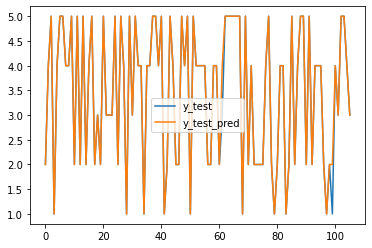

In [36]:
plt.plot(test_y_sr.reset_index(drop=True))
plt.plot(full_pipeline.predict(test_X_df))
plt.legend(['y_test', 'y_test_pred'])

## Thử nghiệm với mô hình ..

In [37]:
full_pipeline = make_pipeline(preprocess_pipeline, LinearRegression())


In [38]:
full_pipeline.fit(new_X_df, new_y_sr)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('coldropper', ColDropper()),
                                 ('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [39]:
(1 - full_pipeline.score(test_X_df, test_y_sr))*100

50.31261063223113